In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
personal_data = pd.read_csv('./data/personal_train.csv')
other_data = pd.read_csv('./data/other_train.csv')
personal_data = personal_data.rename(columns = {'Unnamed: 0':'id'})
personal_data.count()['id']
other_data = other_data.rename(columns = {'Unnamed: 0':'id'})

In [10]:
other_data.head()

,id,name,address,query hyperthyroid,FTI measured,education,lithium,TT4,T4U,capital-loss,...,hypopituitary,medical_info,on antithyroid medication,referral source,education-num,occupation,TBG measured,TBG,race,FTI
0,0,Shondra Burns,1752 Charles Bypass Suite 311\nWest Kristinvil...,f,t,Some-college,f,109.0,0.96,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,10.0,Other-service,f,?,White,114
1,1,Tony Decaire,"33993 Jones Keys Suite 315\nNewtonview, OK 04814",f,t,HS-grad,f,98.0,0.83,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,9.0,Sales,f,?,White,119
2,2,Ruby Presson,"05084 Robert Wall\nParkburgh, SC 25164",f,t,Bachelors,f,144.0,0.95,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,SVI,NaN,Sales,f,?,White,152
3,3,Randy Stewart,Unit 7068 Box 5314\nDPO AE 22517,f,t,Some-college,f,114.0,0.90,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,SVI,NaN,Prof-specialty,f,?,White,128
4,4,Harriet Griffin,"169 Allison Landing\nBrianton, AZ 04857",f,t,Masters,f,99.0,1.04,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",F,SVI,14.0,Prof-specialty,f,?,White,96


In [13]:
other_data.dtypes

id                             int64
name                          object
address                       object
query hyperthyroid            object
FTI measured                  object
education                     object
lithium                       object
TT4                          float64
T4U                          float64
capital-loss                 float64
capital-gain                 float64
tumor                         object
TSH                          float64
T3                           float64
fnlwgt                       float64
hours-per-week               float64
relationship                  object
sick                          object
workclass                     object
TT4 measured                  object
class                         object
marital-status                object
goitre                        object
native-country                object
hypopituitary                 object
medical_info                  object
on antithyroid medication     object
r

In [14]:
len(personal_data.columns)

6

In [15]:
personal_data.dtypes

id                 int64
name              object
address           object
age              float64
sex               object
date_of_birth     object
dtype: object

In [16]:
personal_data.describe()

,id,age
count,2237.000000,2236.000000
mean,1118.000000,51.822004
std,645.910598,20.884439
min,0.000000,1.000000
25%,559.000000,36.000000
50%,1118.000000,54.000000
75%,1677.000000,67.000000
max,2236.000000,455.000000


In [17]:
personal_data.info()
personal_data[personal_data["age"].isnull()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 6 columns):
id               2237 non-null int64
name             2237 non-null object
address          2237 non-null object
age              2236 non-null float64
sex              2237 non-null object
date_of_birth    2236 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 104.9+ KB


,id,name,address,age,sex,date_of_birth
1988,1988,Brenda Wojciechowski,"155 Johnson Circles Suite 311\nSouth Michael, ...",NaN,F,NaN


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

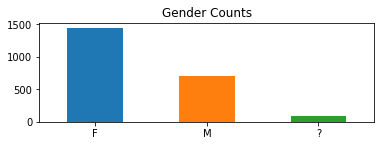

In [18]:
fig_dims = (2, 1)

plt.subplot2grid(fig_dims, (1, 0))
personal_data['sex'].value_counts().plot(kind='bar', 
                                    title='Gender Counts')
plt.xticks(rotation=0)

In [21]:
personal_data[(personal_data['sex'] != 'F') & (personal_data['sex'] != 'M')].count()["id"]

88